In [1]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the given CSV file, and view some sample records

bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike = bike.drop(['instant'], axis=1)
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
bike.isnull().sum()    # Missing value check

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

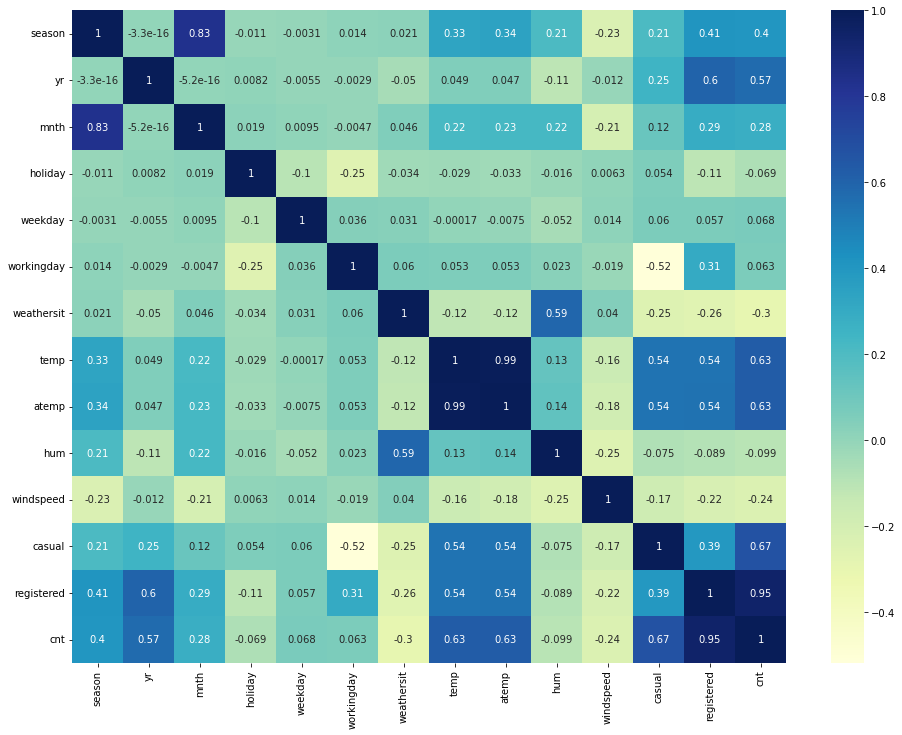

In [6]:
plt.figure(figsize=(16,12))
sns.heatmap(bike.corr(), cmap="YlGnBu", annot = True)
plt.show()


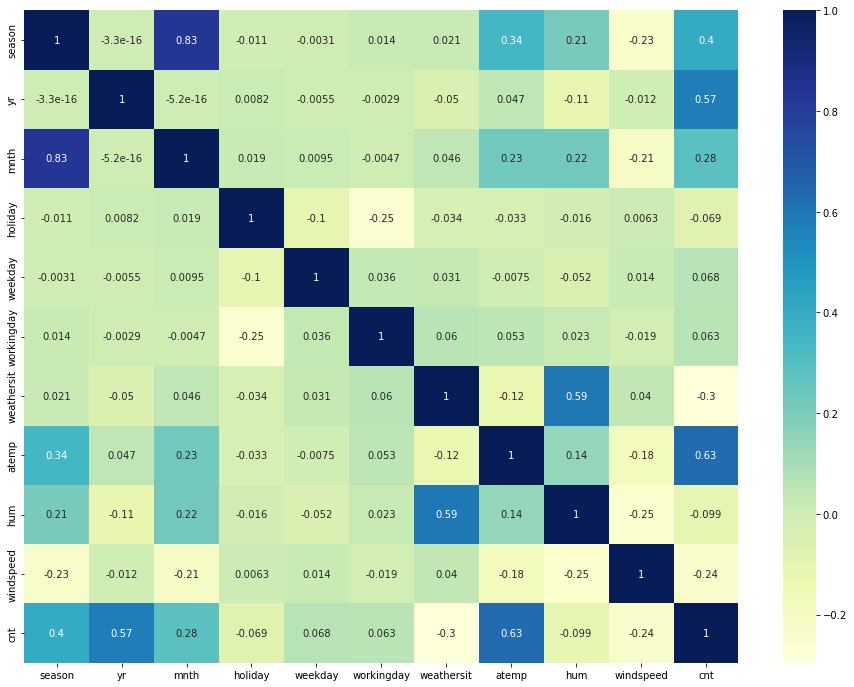

In [7]:
bike = bike.drop(['temp','casual','registered'], axis=1)  # dropping 'temp','casual','registered', because all are highly correlated 
plt.figure(figsize=(16,12))
sns.heatmap(bike.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [8]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [9]:
bike = bike.drop(['dteday'], axis=1)  # It seems that the analysis can be possible by dropping 'dteday'.

In [10]:
bike.shape

(730, 11)

In [11]:
bike1=bike
bike1.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [12]:
# Get the dummy variables for the feature 'season','mnth','weekday' & 'weathersit'.
bike1['season']=bike1['season'].astype('category')
bike1['mnth']=bike1['mnth'].astype('category')
bike1['weekday']=bike1['weekday'].astype('category')
bike1['weathersit']=bike1['weathersit'].astype('category')

#status = pd.get_dummies(bike['season'])#,'mnth','weekday','weathersit'])

In [13]:
bike1 = pd.get_dummies(bike1,drop_first = True)

In [14]:
bike1.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
# filter only atemp=temperature and cnt=price
df = bike1.loc[:, ['atemp', 'cnt']]
df.head()

,atemp,cnt
0,18.18125,985
1,17.68695,801
2,9.47025,1349
3,10.60610,1562
4,11.46350,1600


In [21]:
# making normalised value for the two variables
df_columns = df.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [22]:
# rename columns (since now its an np array)
df = pd.DataFrame(df)
df.columns = df_columns

df.head()

,atemp,cnt
0,0.373517,0.110792
1,0.360541,0.089623
2,0.144830,0.152669
3,0.174649,0.177174
4,0.197158,0.181546


<AxesSubplot:xlabel='atemp', ylabel='cnt'>

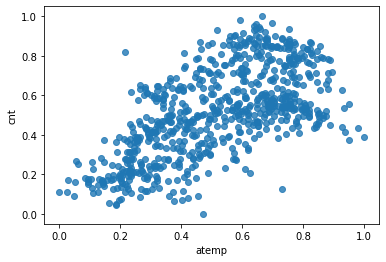

In [23]:
# visualise temperature-price relationship
sns.regplot(x="atemp", y="cnt", data=df, fit_reg=False)

In [24]:
# split into train and test
df_train, df_test = train_test_split(df, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 10)
print(len(df_train))
print(len(df_test))

510
219


In [25]:
# split into X and y for both train and test sets
# reshaping is required since sklearn requires the data to be in shape
X_train = df_train['atemp']
X_train = X_train.values.reshape(-1, 1)
y_train = df_train['cnt']

X_test = df_test['atemp']
X_test = X_test.values.reshape(-1, 1)
y_test = df_test['cnt']

### Polynomial Regression

In [26]:
# fit multiple polynomial features
degrees = [1, 2, 4, 8, 16, 24]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)

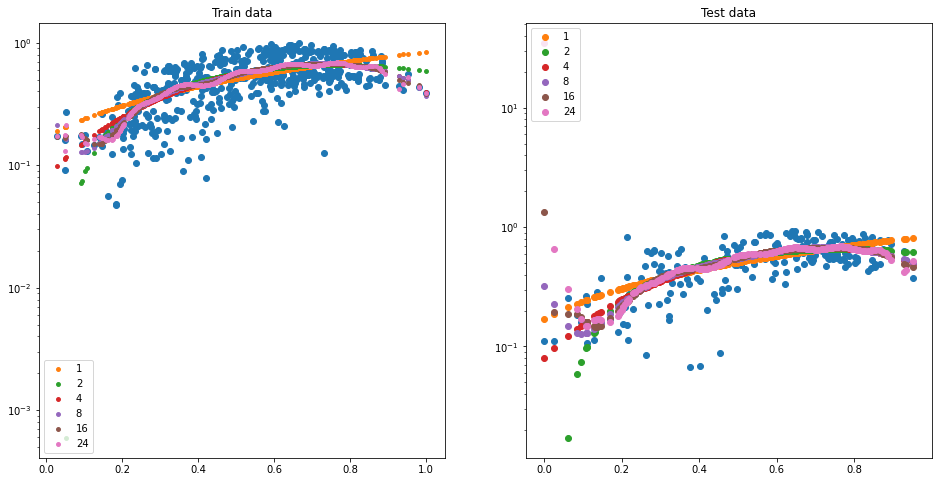

In [27]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train, y_train)
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='lower left')
    
# test data
plt.subplot(122)
plt.scatter(X_test, y_test)
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [28]:
print("R-squared values: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(sklearn.metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(sklearn.metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

R-squared values: 

Polynomial degree 1: train score=0.39, test score=0.43
Polynomial degree 2: train score=0.45, test score=0.46
Polynomial degree 4: train score=0.46, test score=0.49
Polynomial degree 8: train score=0.46, test score=0.48
Polynomial degree 16: train score=0.46, test score=0.35
Polynomial degree 24: train score=0.47, test score=-117.9



### Model Without Cross-Validation
Let's now build a multiple regression model. First, let's build a vanilla MLR model without any cross-validation etc.

In [29]:
bike1.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [24]:
bike1.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [30]:
# train-test 70-30 split
df_train, df_test = train_test_split(bike1, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)

# normalize the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
numeric_vars = ['atemp', 'hum', 'windspeed', 'cnt']
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [31]:
# apply rescaling to the test set also
df_test[numeric_vars] = scaler.fit_transform(df_test[numeric_vars])
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.778767,0.534223,0.149393,0.704300,0,1,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.855132,0.470417,0.231142,0.725421,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.492359,0.777843,0.443398,0.278853,0,0,1,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.805661,0.236659,0.449707,0.545512,0,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.749249,0.070765,0.682387,0.569148,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [32]:
# divide into X_train, y_train, X_test, y_test
y_train = df_train.pop('cnt')
X_train = df_train

y_test = df_test.pop('cnt')
X_test = df_test

#### Using RFE

In [33]:
# num of max features
len(X_train.columns)

28

In [34]:
# first model with an arbitrary choice of n_features, running RFE with number of features=10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             
rfe = rfe.fit(X_train, y_train)

In [35]:
# tuples of (feature name, whether selected, ranking)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 3),
 ('season_4', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 8),
 ('mnth_4', False, 10),
 ('mnth_5', False, 7),
 ('mnth_6', False, 9),
 ('mnth_7', False, 11),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', False, 4),
 ('mnth_11', False, 16),
 ('mnth_12', False, 19),
 ('weekday_1', False, 13),
 ('weekday_2', False, 14),
 ('weekday_3', False, 17),
 ('weekday_4', False, 18),
 ('weekday_5', False, 15),
 ('weekday_6', False, 5),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1)]

In [36]:
# predict prices of X_test
y_pred = rfe.predict(X_test)

# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.7959862955703852


In [39]:
# when RFE with 5 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=5)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.710265394985923


### Cross-Validation in sklearn
Let's now experiment with k-fold CV.

#### K-Fold CV

In [51]:
# k-fold = 5, CV 
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores  

array([0.81768614, 0.83230968, 0.82617838, 0.81066002, 0.84610108])

In [53]:
# mean score
scores.mean()

0.826587059227623

In [54]:
# Score for  MSE
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-0.00766272, -0.00874205, -0.00910812, -0.00822085, -0.0092011 ])

In [55]:
# number of features in X_train
len(X_train.columns)

28

In [56]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 11))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10]}],
             return_train_score=True, scoring='r2', verbose=1)

In [57]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)


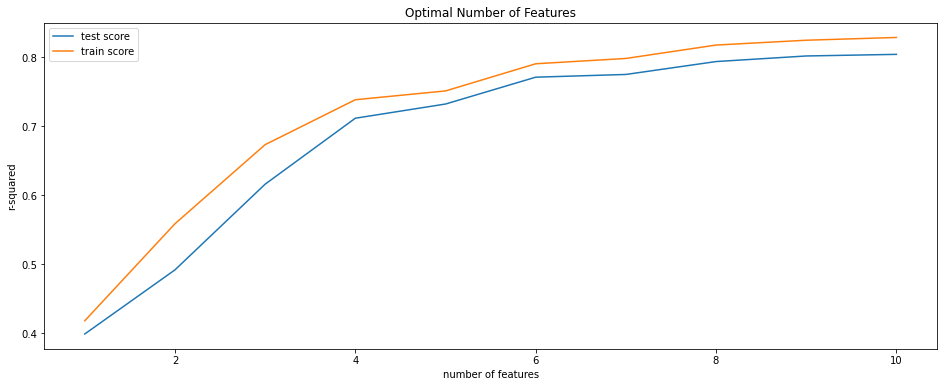

In [58]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [59]:
# final model
n_features_optimal = 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.8307648240178435


the test score is very close to the 'mean test score' on the k-folds (about 83%). 

In [60]:
#Most important features 
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_2', 'season_4',
       'mnth_8', 'mnth_9', 'weathersit_3'],
      dtype='object')

In [61]:
#least important features 
col = X_train.columns[~rfe.support_]
col

Index(['workingday', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_2'],
      dtype='object')